In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import dateutil.parser
import matplotlib.pyplot as plt

In [100]:
# dictionary of text dates and links (June 2020 to September 2020)

date1 = '2020-06-02' 
url1 = 'https://www.reuters.com/article/us-zoom-video-commn-results/zoom-doubles-forecast-for-full-year-revenue-on-remote-work-boost-idUSKBN2392XF'

date2 = '2020-06-11'
url2 = 'https://www.reuters.com/article/zoom-video-commn-privacy-idUSL4N2DO4A4'

date3 = '2020-06-11'
url3 = 'https://www.reuters.com/article/zoom-video-commn-privacy-idUSL4N2DO4A4'

date4 = '2020-06-24'
url4 = 'https://www.reuters.com/article/us-zoom-video-commn-moves-jason-lee-idUSKBN23V2PN'


date5 = '2020-07-01'
url5 = 'https://www.reuters.com/article/us-zoom-video-commn-privacy-idUSKBN2425ZU'

date6 = '2020-07-07'
url6 = 'https://www.reuters.com/article/us-zoom-video-commn-hardware-idUSKBN2481ZK'

date7 = '2020-07-16'
url7 = 'https://www.reuters.com/article/us-motor-f1-zoom-idUSKCN24H1FG'

date8 = '2020-07-21'
url8 = 'https://www.reuters.com/article/us-zoom-video-commn-india-idUSKCN24M0YL'

date9 = '2020-07-30'
url9 = 'https://www.reuters.com/article/us-usa-china-tiktok-zoom/senators-urge-u-s-justice-department-to-probe-tiktok-zoom-idUSKCN24V36O?'

date10 = '2020-08-18'
url10 = 'https://www.reuters.com/article/us-zoom-singapore-data-centre-idUSKCN25E188'

date11 = '2020-08-24'
url11 = 'https://in.reuters.com/article/us-zoom-video-commn-outages/zoom-says-service-restored-after-u-s-users-hit-by-partial-outage-idINKBN25K1NT'

date12 = '2020-08-31'
url12 = 'https://www.reuters.com/article/zoom-video-commn-results/zoom-beats-quarterly-revenue-estimates-on-remote-work-boost-idINL4N2FX4GW'

date13 = '2020-09-01'
url13 = 'https://www.reuters.com/article/us-health-coronavirus-finance-breakingvi-idUSKBN25S4RO'

date14 = '2020-09-08'
url14 = 'https://www.reuters.com/article/us-indonesia-tax-digital/indonesia-adds-twitter-zoom-to-tech-companies-that-must-pay-10-vat-idUSKBN25Z2CU'

date15 = '2020-09-15'
url15 = 'https://www.reuters.com/article/zoom-video-commn-results-int-idUSKBN25R2QV'



url_dict = {date1:url1,
            date2:url2,
            date3:url3,
            date4:url4,
            date5:url5,
            date6:url6,
            date7:url7,
            date8:url8,
            date9:url9,
            date10:url10,
            date11:url11,
            date12:url12,
            date13:url13,
            date14:url14,
            date15:url15
           }


In [101]:
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    print(soup.find('h1').text)

Zoom nearly doubles revenue forecast on remote-work boost, but costs rising
Zoom denies giving user information to Chinese government
Zoom taps former Salesforce executive as information security head
Zoom says added over 100 features as part of 90-day security plan
Zoom rolls out hardware subscription service
Formula One, Zoom announce partnership for virtual Paddock Club
Zoom to open tech centre in India's Bengaluru
Senators urge U.S. Justice Department to probe TikTok, Zoom
Zoom opens new data center in Singapore
Zoom says service restored after U.S. users hit by partial outage
Zoom beats quarterly revenue estimates on remote work boost
Breakingviews - Corona Capital: Zooming through Covid
Indonesia adds Twitter, Zoom to tech companies that must pay 10% VAT
Zoom forecasts sales surge as video conferencing becomes a daily routine


In [102]:
# extract info from each website and store it in dataframe
df_text = pd.DataFrame(columns = ['Date','Header','Text'])
header = []
text = []
date = []
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    date.append(datetime.strptime(key, '%Y-%m-%d').date())
    url_header = soup.find('h1').text
    
    header.append(url_header)
    url_text = soup.find('div', class_ = 'ArticleBodyWrapper').text
    text.append(url_text)
df_text['Date']=date
df_text['Header']=header
df_text['Text']=text

# remove the author and "min read" sections
df_text_temp = [] 
for text in df_text['Text']:
    loc = text.find('(Reuters)')
    df_text_temp.append(text[loc+9:])
df_text['Text'] = df_text_temp



In [103]:
df_text['Date'] = df_text['Date'].apply(lambda x: pd.to_datetime(x))
df_text.head()

,Date,Header,Text
0,2020-06-02,Zoom nearly doubles revenue forecast on remote...,- Zoom Video Communications Inc ZM.O nearly d...
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...
2,2020-06-24,Zoom taps former Salesforce executive as infor...,- Zoom Video Communications Inc on Wednesday ...
3,2020-07-01,Zoom says added over 100 features as part of 9...,- Zoom Video Communications Inc said on Wedne...
4,2020-07-07,Zoom rolls out hardware subscription service,- Zoom Video Communications Inc ZM.O said on ...


In [104]:
# import stock data of Zoom
df_stock = pd.read_csv('ZM.csv', header=0)

df_stock['Date']=df_stock['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


df_stock = df_stock.drop(['High','Low','Close','Adj Close'], axis=1)
df_stock.head()

,Date,Open,Volume
0,2019-12-02,74.059998,3138600
1,2019-12-03,66.720001,2444200
2,2019-12-04,70.500000,2076500
3,2019-12-05,70.029999,3672600
4,2019-12-06,64.260002,11253600


In [105]:
df_text['Date'].dtypes

dtype('<M8[ns]')

In [106]:
df_stock['Date'].dtypes

dtype('<M8[ns]')

In [107]:
# Merge two dataframes
df = pd.merge(df_text, df_stock, how='inner', on='Date')
df = df.sort_values('Date')

In [108]:
# show % change in stock price after news article publish
pct_stock = df['Open'].pct_change()*100
df['% Change in Stock Price'] = pct_stock
pct_volume = df['Volume'].pct_change()*100
df['% Change in Volume'] = pct_volume
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume
0,2020-06-02,Zoom nearly doubles revenue forecast on remote...,- Zoom Video Communications Inc ZM.O nearly d...,210.250000,36853400,NaN,NaN
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...,219.179993,17615800,4.247321,-52.200340
2,2020-06-24,Zoom taps former Salesforce executive as infor...,- Zoom Video Communications Inc on Wednesday ...,254.500000,9862800,16.114613,-44.011626
3,2020-07-01,Zoom says added over 100 features as part of 9...,- Zoom Video Communications Inc said on Wedne...,251.350006,6803300,-1.237719,-31.020603
4,2020-07-07,Zoom rolls out hardware subscription service,- Zoom Video Communications Inc ZM.O said on ...,261.549988,7819700,4.058079,14.939809



# Processing the text


## import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [109]:
# import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [110]:

text_nlp = nlp(df['Text'][1]) 
# Remove stop words
text_nlp_clean = [word for word in text_nlp if word.is_stop == False]
# Lemmatize words
text_nlp_clean = [word.lemma_ for word in text_nlp_clean]

In [111]:
text_clean = []
for ind, row in df.iterrows():
    
    # lower casing
    text_lower = row['Text'].lower()
    
    # tokenization
    text_nlp = nlp(row['Text']) 
    
    # remove punctuation and empty space
    text_nlp_clean = [word for word in text_nlp if not word.is_punct | word.is_space]
    
    # Remove stop words
    text_nlp_clean = [word for word in text_nlp_clean if word.is_stop == False]
    
    # Lemmatize tokens
    text_nlp_clean = [word.lemma_ for word in text_nlp_clean]
    
    # add preprocessed text to list
    text_clean.append(text_nlp_clean)

# turn list of strings to string
to_string = []
for text in text_clean:
    to_string.append(' '.join(text))


df['Text (clean)'] = to_string
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean)
0,2020-06-02,Zoom nearly doubles revenue forecast on remote...,- Zoom Video Communications Inc ZM.O nearly d...,210.250000,36853400,NaN,NaN,Zoom Video Communications Inc ZM.O nearly doub...
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...,219.179993,17615800,4.247321,-52.200340,Zoom Video Communications Inc say Thursday pro...
2,2020-06-24,Zoom taps former Salesforce executive as infor...,- Zoom Video Communications Inc on Wednesday ...,254.500000,9862800,16.114613,-44.011626,Zoom Video Communications Inc Wednesday name S...
3,2020-07-01,Zoom says added over 100 features as part of 9...,- Zoom Video Communications Inc said on Wedne...,251.350006,6803300,-1.237719,-31.020603,Zoom Video Communications Inc say Wednesday ad...
4,2020-07-07,Zoom rolls out hardware subscription service,- Zoom Video Communications Inc ZM.O said on ...,261.549988,7819700,4.058079,14.939809,Zoom Video Communications Inc zm.o say Tuesday...


# Using a Pretrained Model 

In [112]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [113]:
# a function to return sentiment score
def polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_score = []
for text in df['Text (clean)']:
    score = polarity_score(text)
    vader_score.append(score)

df['Vader Sentiment Score'] = vader_score

In [114]:
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score
0,2020-06-02,Zoom nearly doubles revenue forecast on remote...,- Zoom Video Communications Inc ZM.O nearly d...,210.250000,36853400,NaN,NaN,Zoom Video Communications Inc ZM.O nearly doub...,0.9295
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...,219.179993,17615800,4.247321,-52.200340,Zoom Video Communications Inc say Thursday pro...,0.5106
2,2020-06-24,Zoom taps former Salesforce executive as infor...,- Zoom Video Communications Inc on Wednesday ...,254.500000,9862800,16.114613,-44.011626,Zoom Video Communications Inc Wednesday name S...,0.9442
3,2020-07-01,Zoom says added over 100 features as part of 9...,- Zoom Video Communications Inc said on Wedne...,251.350006,6803300,-1.237719,-31.020603,Zoom Video Communications Inc say Wednesday ad...,0.9628
4,2020-07-07,Zoom rolls out hardware subscription service,- Zoom Video Communications Inc ZM.O said on ...,261.549988,7819700,4.058079,14.939809,Zoom Video Communications Inc zm.o say Tuesday...,0.9442


## Sentiment Analysis

In [115]:
# run this cell to import nltk
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

In [116]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [118]:
# split the data into two pieces (80-20), one for training and one for testing (validation set)  
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [119]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [120]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [121]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11340


In [122]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [123]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

In [124]:
Y.shape

(8000, 1)

### SVM Parameters

In [125]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)


C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [126]:

# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [127]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet_prob(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict_proba(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [128]:

my_tweet = 'The plot was terrible and I was sad until the ending!'
predict_tweet(my_tweet, freqs)

array([0.])

#DEEP LEARNING

In [ ]:
import sklearn
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics
import tensorflow as tf
from scipy.special import softmax
import os
import numpy as np
import pandas as pd
import json
import torch
import torch.nn as nn
import nltk
from tqdm import tqdm
import spacy
import torch
import torchtext
import torchtext.data
import torch.nn as nn
import torch.nn.functional as F
from scipy.special import softmax
from torchtext.vocab import Vocab
from nltk.corpus import twitter_samples 

nlp = spacy.load('en')
nltk.download('punkt')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# %% ----------------------------------- Hyper Parameters --------------------------------------------------------------
class Args:
    def __init__(self):
        self.seq_len = "get_max_from_data"
        self.embedding_dim = 50
        self.n_epochs = 10
        self.lr = 1e-2
        self.batch_size = 512
        self.train = True
        self.save_model = True


args = Args()

In [ ]:
# %% ----------------------------------- Helper Functions --------------------------------------------------------------
def acc(x, y, return_labels=False):
    with torch.no_grad():
        logits = torch.empty(len(x), 2)
        for batch in range(len(x) // args.batch_size + 1):
            inds = slice(batch * args.batch_size, (batch + 1) * args.batch_size)
            logits[inds] = model(x[inds])
        pred_labels = np.argmax(logits.cpu().numpy(), axis=1)
    if return_labels:
        return pred_labels
    else:
        return 100*accuracy_score(y.cpu().numpy(), pred_labels)


def extract_vocab_dict_and_msl(sentences_train, sentences_dev):
    """ Tokenizes all the sentences and gets a dictionary of unique tokens and also the maximum sequence length """
    tokens, ms_len = [], 0
    for sentence in list(sentences_train) + list(sentences_dev):
        tokens_in_sentence = nltk.word_tokenize(sentence)
        if ms_len < len(tokens_in_sentence):
            ms_len = len(tokens_in_sentence)
        tokens += tokens_in_sentence
    token_vocab = {key: i for key, i in zip(set(tokens), range(1, len(set(tokens))+1))}
    if len(np.unique(list(token_vocab.values()))) != len(token_vocab):
        "There are some rep words..."
    return token_vocab, ms_len


def convert_to_ids(raw_sentences, vocab_dict, pad_to):
    """ Takes an NumPy array of raw text sentences and converts to a sequence of token ids """
    x = np.empty((len(raw_sentences), pad_to))
    for idx, sentence in enumerate(raw_sentences):
        word_ids = []
        for token in nltk.word_tokenize(sentence):
            try:
                word_ids.append(vocab_dict[token])
            except:
                word_ids.append(vocab_dict[token])
        if pad_to < len(word_ids):
            x[idx] = word_ids[:pad_to]
        else:
            x[idx] = word_ids + [0] * (pad_to - len(word_ids))
    return x


def get_glove_embeddings(vocab_dict):
    with open("glove.6B.50d.txt", "r") as s:
        glove = s.read()
    embeddings_dict = {}
    for line in glove.split("\n")[:-1]:
        text = line.split()
        if text[0] in vocab_dict:
            embeddings_dict[vocab_dict[text[0]]] = torch.from_numpy(np.array(text[1:], dtype="float32"))
    return embeddings_dict


def get_glove_table(vocab_dict, glove_dict):
    lookup_table = torch.empty((len(vocab_dict)+2, 50))
    for token_id in sorted(vocab_dict.values()):
        if token_id in glove_dict:
            lookup_table[token_id] = glove_dict[token_id]
        else:
            lookup_table[token_id] = torch.zeros((1, 50))  # For unknown tokens
    lookup_table[0] = torch.zeros((1, 50))
    return lookup_table



In [ ]:
data_train = pd.read_csv("original_data/train.tsv", sep="\t")
x_train_raw, y_train = data_train["sentence"].values, torch.LongTensor(data_train["label"].values).to(device)
data_dev = pd.read_csv("original_data/dev.tsv", sep="\t")
x_dev_raw, y_dev = data_dev["sentence"].values, torch.LongTensor(data_dev["label"].values).to(device)


In [ ]:
# %% -------------------------------------- Data Prep ------------------------------------------------------------------
try:
    with open("example_prep_data/vocab_dict.json", "r") as s:
        token_ids = json.load(s)
    msl = np.load("example_prep_data/max_sequence_length.npy").item()
except:
    print("Tokenizing all the examples to get a vocab dict and the maximum sequence length...")
    token_ids, msl = extract_vocab_dict_and_msl(x_train_raw, x_dev_raw)
    os.mkdir("example_prep_data")
    with open("example_prep_data/vocab_dict.json", "w") as s:
        json.dump(token_ids, s)
    np.save("example_prep_data/max_sequence_length.npy", np.array([msl]))
if args.seq_len == "get_max_from_data":
    args.seq_len = msl

glove_embeddings = get_glove_embeddings(token_ids)

try:
    x_train = np.load("example_prep_data/prep_train_len{}.npy".format(args.seq_len))
    x_dev = np.load("example_prep_data/prep_dev_len{}.npy".format(args.seq_len))
except:
    print("Converting all the sentences to sequences of token ids...")
    x_train = convert_to_ids(x_train_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_train_len{}.npy".format(args.seq_len), x_train)
    x_dev = convert_to_ids(x_dev_raw, token_ids, args.seq_len)
    np.save("example_prep_data/prep_dev_len{}.npy".format(args.seq_len), x_dev)




In [ ]:
x_train, x_dev = torch.LongTensor(x_train).to(device), torch.LongTensor(x_dev).to(device)

In [ ]:
# %% -------------------------------------- CNN Class ------------------------------------------------------------------
class CNN(nn.Module):
    def __init__(self, vocab_size):
        super(CNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size + 2, args.embedding_dim)

        self.conv1 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm1 = nn.BatchNorm1d(args.embedding_dim)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 9)
        self.convnorm2 = nn.BatchNorm1d(args.embedding_dim)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(args.embedding_dim, args.embedding_dim, 7)
        self.linear = nn.Linear(args.embedding_dim, 2)
        self.act = torch.relu

    def forward(self, x):
        # nn.Conv1d operates on the columns, each embedding dimension is considered as one channel
        x = self.embedding(x).permute(0, 2, 1)
        x = self.pool1(self.convnorm1(self.act(self.conv1(x))))
        x = self.pool2(self.convnorm2(self.act(self.conv2(x))))
        return self.linear(self.act(self.conv3(x)).reshape(-1, args.embedding_dim))



In [ ]:
# %% -------------------------------------- Training Prep ----------------------------------------------------------
model = CNN(len(token_ids)).to(device)
look_up_table = get_glove_table(token_ids, glove_embeddings)
model.embedding.weight.data.copy_(look_up_table)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# %% -------------------------------------- Training Loop ----------------------------------------------------------
labels_ditrib = torch.unique(y_dev, return_counts=True)
print("The no information rate is {:.2f}".format(100*labels_ditrib[1].max().item()/len(y_dev)))
if args.train:
    acc_dev_best = 0
    print("Starting training loop...")
    for epoch in range(args.n_epochs):

        loss_train, train_steps = 0, 0
        model.train()
        total = len(x_train) // args.batch_size + 1  # Initiates a progress bar that will be updated for each batch
        with tqdm(total=total, desc="Epoch {}".format(epoch)) as pbar:  # "Epoch" will be updated for each epoch
            for batch in range(len(x_train)//args.batch_size + 1):
                inds = slice(batch*args.batch_size, (batch+1)*args.batch_size)
                optimizer.zero_grad()
                logits = model(x_train[inds])
                loss = criterion(logits, y_train[inds])
                loss.backward()
                optimizer.step()
                loss_train += loss.item()
                train_steps += 1
                pbar.update(1)  # Updates the progress and the training loss
                pbar.set_postfix_str("Training Loss: {:.5f}".format(loss_train / train_steps))

        model.eval()
        with torch.no_grad():
            y_dev_pred = model(x_dev)
            loss = criterion(y_dev_pred, y_dev)
            loss_test = loss.item()

        acc_dev = acc(x_dev, y_dev)
        print("Epoch {} | Train Loss {:.5f}, Train Acc {:.2f} - Test Loss {:.5f}, Test Acc {:.2f}".format(
            epoch, loss_train/train_steps, acc(x_train, y_train), loss_test, acc_dev))

        if acc_dev > acc_dev_best and args.save_model:
            torch.save(model.state_dict(), "cnn_sentiment.pt")
            print("The model has been saved!")
            acc_dev_best = acc_dev

# Test of Deep Learning

In [ ]:
x = None
for i in range(10):
    test = convert_to_ids([x_train_raw[i]], token_ids, args.seq_len)
    test = torch.LongTensor(test).to(device)
    pred = model(test).cpu().detach().numpy()[0]
    x = softmax(pred)
    print(softmax(pred),y_train[i])

In [ ]:
x = None
deep_learning_sentiment_prob = []

for i in df.iloc[:,2]:
    test = convert_to_ids([i], token_ids, args.seq_len)
    test = torch.LongTensor(test).to(device)
    pred = model(test).cpu().detach().numpy()[0]
    x = softmax(pred)
    sentiment_prob.append(x[1])

In [ ]:
df['deep_learning_sentiment_prob'] = sentiment_prob

#END OF DEEP LEARNING

# Testing the Model 

In [129]:
sentiment = []
sentiment_prob = []
for i in df.iloc[:,2]:
    sentiment.append(predict_tweet(i, freqs)[0])
    sentiment_prob.append(predict_tweet_prob(i, freqs)[0][1])

In [130]:
sentiment


[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]

In [131]:
sentiment_prob

[0.34843847625364516,
 0.6755430085014102,
 0.7609195145575649,
 0.9228283272817779,
 0.6050521409884354,
 0.24438262108230238,
 0.19620956838873493,
 0.3992342993835243,
 0.41324759211955014,
 0.09907528846684727,
 0.7638819753506009,
 0.0034492514897051713,
 0.8662636828470726,
 0.45439296762724446]

In [132]:
# Converting % stock price change to % stock price change per day
days = [0]
for i in range(len(df['Date'])):
    if i != 0:
        date_diff = df['Date'][i]-df['Date'][i-1]
        day = date_diff.days
        days.append(day)
df['Days Elapsed'] = days
df['Average % Change in Stock Price'] = df['% Change in Stock Price']/df['Days Elapsed']
df['Average % Change in Volume'] = df['% Change in Volume']/df['Days Elapsed']

df['Logistic Regression Sentiment'] = sentiment
df['Logistic Regression Sentiment Score'] = sentiment_prob


df.head(2)

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score,Days Elapsed,Average % Change in Stock Price,Average % Change in Volume,Logistic Regression Sentiment,Logistic Regression Sentiment Score
0,2020-06-02,Zoom nearly doubles revenue forecast on remote...,- Zoom Video Communications Inc ZM.O nearly d...,210.250000,36853400,NaN,NaN,Zoom Video Communications Inc ZM.O nearly doub...,0.9295,0,NaN,NaN,0.0,0.348438
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...,219.179993,17615800,4.247321,-52.20034,Zoom Video Communications Inc say Thursday pro...,0.5106,9,0.471925,-5.800038,1.0,0.675543


## Outlier Removal

In [154]:
Q1_stock = df['% Change in Stock Price'].quantile(0.25)
Q3_stock = df['% Change in Stock Price'].quantile(0.75)
IQR_stock = Q3_stock - Q1_stock
lower_bound_stock = Q1_stock-1.5*IQR_stock
upper_bound_stock = Q3_stock+1.5*IQR_stock

Q1_volume = df['% Change in Volume'].quantile(0.25)
Q3_volume = df['% Change in Volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume-1.5*IQR_volume
upper_bound_volume = Q3_volume+1.5*IQR_volume




df_plot_stock = df[(df['% Change in Stock Price']>lower_bound_stock) & (df['% Change in Stock Price']<upper_bound_stock)]
df_plot_volume = df[(df['% Change in Volume']>lower_bound_volume) & (df['% Change in Volume']<upper_bound_stock)]

df_plot_volume.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean),Vader Sentiment Score,Days Elapsed,Average % Change in Stock Price,Average % Change in Volume,Logistic Regression Sentiment,Logistic Regression Sentiment Score
1,2020-06-11,Zoom denies giving user information to Chinese...,- Zoom Video Communications Inc said on Thurs...,219.179993,17615800,4.247321,-52.200340,Zoom Video Communications Inc say Thursday pro...,0.5106,9,0.471925,-5.800038,1.0,0.675543
2,2020-06-24,Zoom taps former Salesforce executive as infor...,- Zoom Video Communications Inc on Wednesday ...,254.500000,9862800,16.114613,-44.011626,Zoom Video Communications Inc Wednesday name S...,0.9442,13,1.239586,-3.385510,1.0,0.760920
3,2020-07-01,Zoom says added over 100 features as part of 9...,- Zoom Video Communications Inc said on Wedne...,251.350006,6803300,-1.237719,-31.020603,Zoom Video Communications Inc say Wednesday ad...,0.9628,7,-0.176817,-4.431515,1.0,0.922828
4,2020-07-07,Zoom rolls out hardware subscription service,- Zoom Video Communications Inc ZM.O said on ...,261.549988,7819700,4.058079,14.939809,Zoom Video Communications Inc zm.o say Tuesday...,0.9442,6,0.676347,2.489968,1.0,0.605052
5,2020-07-16,"Formula One, Zoom announce partnership for vir...",- Formula One fans will be able to get a bett...,250.389999,5420100,-4.266867,-30.686599,Formula fan able well flavour race day experie...,0.9565,9,-0.474096,-3.409622,0.0,0.244383


## Plotting

### VADER Sentiment Score

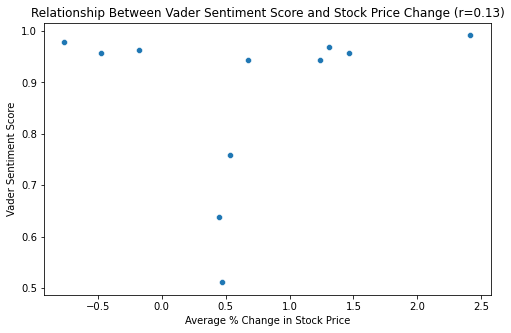

In [143]:
import seaborn as sns

df_scatter = df_plot_stock[['Average % Change in Stock Price','Average % Change in Volume','Vader Sentiment Score','Logistic Regression Sentiment Score']]
plt.figure(figsize=(8,5))
sns.scatterplot(x =df_scatter['Average % Change in Stock Price'], y = df_scatter['Vader Sentiment Score'])
plt.title('Relationship Between Vader Sentiment Score and Stock Price Change (r={})'.format((np.corrcoef(df_scatter['Average % Change in Stock Price'], df_scatter['Vader Sentiment Score'])[1,0]).round(2)))
plt.show()



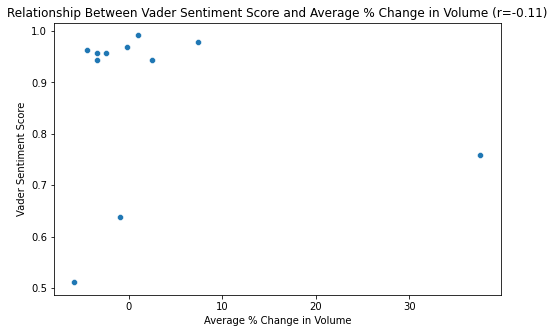

In [150]:
plt.figure(figsize=(8,5))
sns.scatterplot(x =df_scatter['Average % Change in Volume'], y = df_scatter['Vader Sentiment Score'])
plt.title('Relationship Between Vader Sentiment Score and Average % Change in Volume (r={})'.format((np.corrcoef(df_scatter['Average % Change in Volume'], df_scatter['Vader Sentiment Score'])[1,0]).round(2)))
plt.show()


### Logistic Regression Score

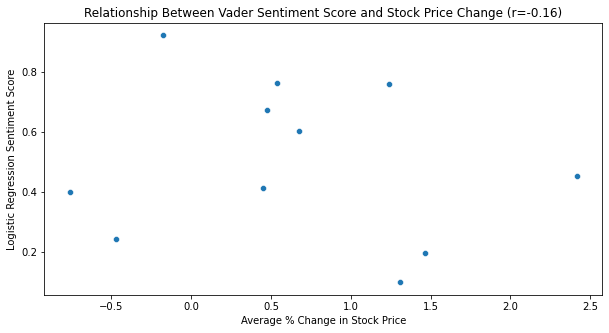

In [145]:
plt.figure(figsize=(10,5))
sns.scatterplot(x =df_scatter['Average % Change in Stock Price'], y = df_scatter['Logistic Regression Sentiment Score'])
plt.title('Relationship Between Vader Sentiment Score and Stock Price Change (r={})'.format((np.corrcoef(df_scatter['Average % Change in Stock Price'], df_scatter['Logistic Regression Sentiment Score'])[1,0]).round(2)))
plt.show()

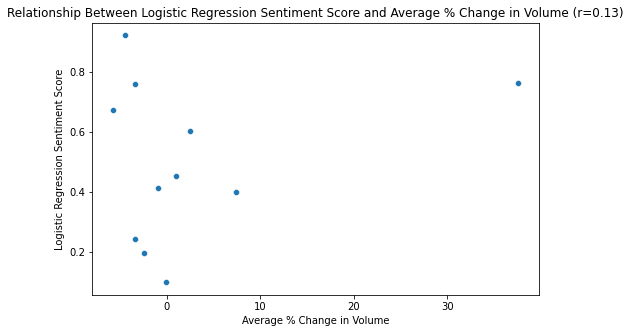

In [149]:
plt.figure(figsize=(8,5))
sns.scatterplot(x =df_scatter['Average % Change in Volume'], y = df_scatter['Logistic Regression Sentiment Score'])
plt.title('Relationship Between Logistic Regression Sentiment Score and Average % Change in Volume (r={})'.format((np.corrcoef(df_scatter['Average % Change in Stock Price'], df_scatter['Vader Sentiment Score'])[1,0]).round(2)))
plt.show()
